## Key Learnings of Session 2
**ML Project:**
- First: Perform basic descriptive statistics to get an idea of what the dataset is about and might identify first insights on what ML Model might be the most applicable fot that certain task
- Plot the Data for visualization and deeper understanding
  - Helps to identify capped data, such as Price of smth doensn't go beyond certain X --> would manipulate the ML and lead to wrong forecasts
- Symmetrical data and more Bell shaped data over skewed right and skewed left data --> Apply Logarithm, it makes the curve more towards Gaussian distribution

**Data Cleaning/Preparation**
 - handle missing values (e.g. with Imputation)
    - e.g. SimpleImputer() --> replaces missing values with the median, mean etc of the respective attribute
 - deal with categorical attribute
    - OrdinalEncoder() --> Convert text values as categorical attributes to numerical values, cause ML prefer to work with numerical values
 - deal with ordinal attribute (such as "Slow", "medium", "fast") --> ML will assume two nearby values are more similar to ea than to distant values
    - use OneHotEncoder to create one binary attribute per category (Only one attribute will than be equal to 1 (hot) while others are 0)
      - eg array([(0.,1.,0.)]) --> means "Medium" 
 
Transformation Pipeline can be used to automate such tasks
- Apply Standardization(values are not restricted to specific range)
  - Less effected by outliers
- MinMaxScaling(values range from 0 to 1) to put numerical attributes on the same scale
- FunctionTransformer() --> Standardize values with np.log
- StandardScaler() --> 
- Feature Scaling and Transformation

- Split dataset into test and train set

**Evaluation of ML model**
  - Cross-validation() --> Splits data into X nonoverlapping splits called "Folds"
    - then it trains and evaluates the model on those X splits
  - Apply Mean Squared error, R Squared Error, Median absolute error
  - Interpret those results

**Fine Tune Model**
- Find good comination of hyperparamter values
 - examples of hyperparameters for Random Forest:
    - Number of decision trees in the forest
    - Maximum depth of each decision tree

  - Grid SearchCV(), Random Search() --> to tune the hyperparameters
    - Hyperparameters are parameters to learned from the dataset but are set before training the model, they depend which model we choose 
    - e.g. Logistic regression possible hyperparameters are "tol" and "max_iter"

-----------------------------------------------------------

#### Data import

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
from google.colab import data_table
import matplotlib.pyplot as plt
data_table.enable_dataframe_formatter()

drive.mount('/content/drive')
cc_apps = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/crx.data", header=None)


cc_apps.head(5)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


#### Descriptive Statistics & Visualization

In [ ]:
# Print summary statistics
cc_apps_description = cc_apps.describe()
print(cc_apps_description)

print('\n')

# Print DataFrame information
cc_apps_info = cc_apps.info()
print(cc_apps_info)

print('\n')

cc_apps.tail(17)

               2           7          10             14
count  690.000000  690.000000  690.00000     690.000000
mean     4.758725    2.223406    2.40000    1017.385507
std      4.978163    3.346513    4.86294    5210.102598
min      0.000000    0.000000    0.00000       0.000000
25%      1.000000    0.165000    0.00000       0.000000
50%      2.750000    1.000000    0.00000       5.000000
75%      7.207500    2.625000    3.00000     395.500000
max     28.000000   28.500000   67.00000  100000.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       690 non-null    object 
 1   1       690 non-null    object 
 2   2       690 non-null    float64
 3   3       690 non-null    object 
 4   4       690 non-null    object 
 5   5       690 non-null    object 
 6   6       690 non-null    object 
 7   7       690 non-null    float64
 8   8       690 no

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
673,?,29.50,2.000,y,p,e,h,2.000,f,f,0,f,g,00256,17,-
674,a,37.33,2.500,u,g,i,h,0.210,f,f,0,f,g,00260,246,-
675,a,41.58,1.040,u,g,aa,v,0.665,f,f,0,f,g,00240,237,-
676,a,30.58,10.665,u,g,q,h,0.085,f,t,12,t,g,00129,3,-
677,b,19.42,7.250,u,g,m,v,0.040,f,t,1,f,g,00100,1,-
678,a,17.92,10.210,u,g,ff,ff,0.000,f,f,0,f,g,00000,50,-
679,a,20.08,1.250,u,g,c,v,0.000,f,f,0,f,g,00000,0,-
680,b,19.50,0.290,u,g,k,v,0.290,f,f,0,f,g,00280,364,-
681,b,27.83,1.000,y,p,d,h,3.000,f,f,0,f,g,00176,537,-
682,b,17.08,3.290,u,g,i,v,0.335,f,f,0,t,g,00140,2,-


In [ ]:
# Check Ratio
counts = cc_apps[15].value_counts()
num_ones = counts["+"]
num_zeros = counts["-"]

print("Number of approved: ", num_ones)
print("Number of denied: ", num_zeros)

Number of approved:  307
Number of denied:  383


array([[<Axes: title={'center': '2'}>, <Axes: title={'center': '7'}>],
       [<Axes: title={'center': '10'}>, <Axes: title={'center': '14'}>]],
      dtype=object)

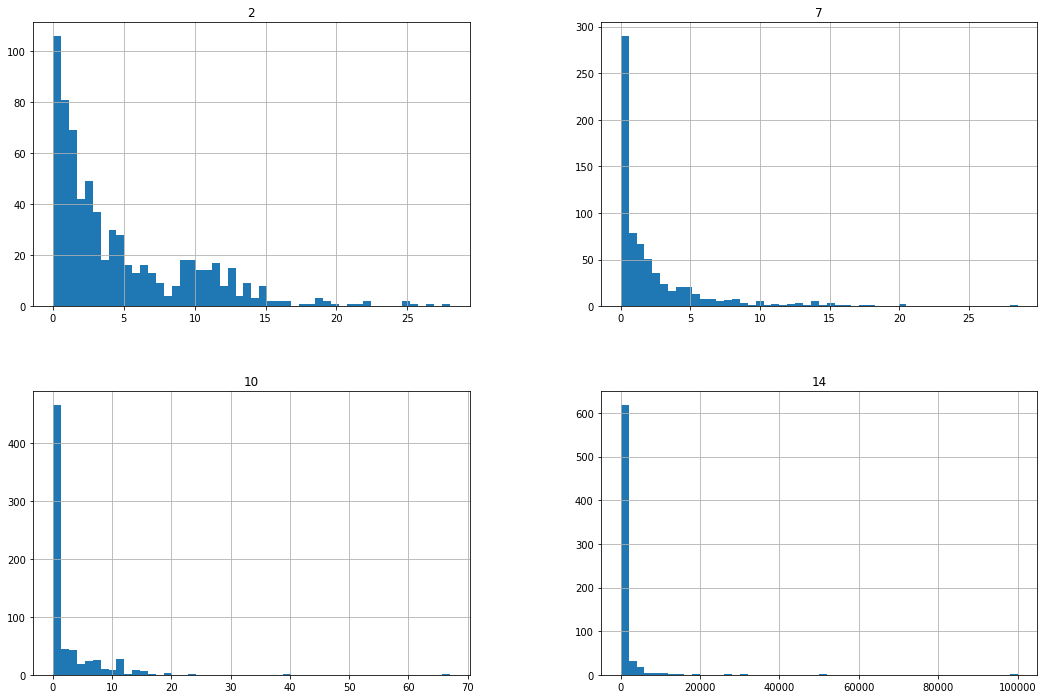

In [ ]:
#Visualization
cc_apps.hist(bins=50, figsize=(18,12))

#### Correlations

In [ ]:

replaced_label = cc_apps[15].replace({'-':0 , '+':1})
cc_apps[15] = replaced_label
corr = cc_apps.corr()
corr[15].sort_values(ascending=False)



15    1.000000
10    0.406410
7     0.322475
2     0.206294
14    0.175657
Name: 15, dtype: float64

#### Split Dataset

In [ ]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Drop the features 11 and 13
cc_apps = cc_apps.drop([11, 13], axis=1)

# Split into train and test sets
cc_apps_train, cc_apps_test = train_test_split(cc_apps, test_size=0.33, random_state=42)

In [ ]:
# Check Ratio
counts = cc_apps_train[15].value_counts()
num_ones = counts[1]
num_zeros = counts[0]

print("Number of approved: ", num_ones)
print("Number of denied: ", num_zeros)

Number of approved:  204
Number of denied:  258


#### Replace question marks & missing values with the mean (imputation)


In [ ]:
# Import numpy
import numpy as np

# Replace the '?'s with NaN in the train and test sets
cc_apps_train = cc_apps_train.replace("?", "NaN")
cc_apps_test = cc_apps_test.replace("?", "NaN")

In [ ]:
# Impute the missing values with mean imputation
cc_apps_train.fillna(cc_apps_train.mean(), inplace=True)
cc_apps_test.fillna(cc_apps_train.mean(), inplace=True)

# Count the number of NaNs in the datasets and print the counts to verify
print(cc_apps_train.isnull().sum())
print(cc_apps_test.isnull().sum())

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
12    0
14    0
15    0
dtype: int64
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
12    0
14    0
15    0
dtype: int64


<ipython-input-252-3d2ba7b8a823>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  cc_apps_train.fillna(cc_apps_train.mean(), inplace=True)
<ipython-input-252-3d2ba7b8a823>:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  cc_apps_test.fillna(cc_apps_train.mean(), inplace=True)


#### Treat missing values on the non numeric values --> impute with the most frequent value of each feature 

In [ ]:
# Iterate over each column of cc_apps_train
for col in cc_apps_train:
    # Check if the column is of object type
    if cc_apps_train[col].dtypes == 'object':
        # Impute with the most frequent value
        cc_apps_train = cc_apps_train.fillna(cc_apps_train[col].value_counts().index[0])
        cc_apps_test = cc_apps_test.fillna(cc_apps_train[col].value_counts().index[0])
# Count the number of NaNs in the dataset and print the counts to verify
print(cc_apps_train.isnull().sum())
print(cc_apps_test.isnull().sum())

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
12    0
14    0
15    0
dtype: int64
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
12    0
14    0
15    0
dtype: int64


#### Convert Categorical features into numerical features 

In [ ]:

# Convert the categorical features in the train and test sets independently
cc_apps_train = pd.get_dummies(cc_apps_train)
cc_apps_test = pd.get_dummies(cc_apps_test)

# Reindex the columns of the test set aligning with the train set
cc_apps_test = cc_apps_test.reindex(columns=cc_apps_train.columns, fill_value=0)

#### Calc correlation again after transforming non numeric features to numerics

In [ ]:
corr1 = cc_apps_test.corr()
corr1[15].sort_values(ascending=False)

15         1.000000
8_t        0.697248
9_t        0.466022
10         0.428459
7          0.315247
             ...   
1_74.83         NaN
1_76.75         NaN
3_NaN           NaN
4_NaN           NaN
6_o             NaN
Name: 15, Length: 334, dtype: float64

#### Extract the label feature from the rest of the dataset & Scale Feature values to a standarized range of [0:1] 

**.iloc[*rows:columns*]** 
- iloc[:,:-1] => all rows, and all columns without the last col
- iloc[:,[-1]] => all rows, and only the last column

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Segregate features and labels into separate variables 
X_train, y_train = cc_apps_train.iloc[:,:-1].values, cc_apps_train.iloc[:,[-1]].values
X_test, y_test = cc_apps_test.iloc[:,:-1].values, cc_apps_test.iloc[:,[-1]].values
# Instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0,1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.transform(X_test)

In [ ]:
# Check ratio of approved and denied 
count0 = 0
count1 = 0

# Loop over each element in Ytest
for y in y_train:
    # If the element is 0, increment the count0 variable
    if y == 0:
        count0 += 1
    # If the element is 1, increment the count1 variable
    elif y == 1:
        count1 += 1

# Print the counts
print("Number of 0's:", count0)
print("Number of 1's:", count1)


Number of 0's: 428
Number of 1's: 34


*Why are so so many more denied than approved ?!*

#### Fitting logistic regression model 
- Classification Task since label feature is either "accept" or "deny" credid card approval

In [ ]:
from sklearn.linear_model import LogisticRegression

# Instantiate a LogisticRegression classifier with default parameter values
logreg = LogisticRegression()

# Fit logreg to the train set
logreg.fit(rescaledX_train, y_train)


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

#### Evaluate the model with a confusion matrix
- array[0][0] => 204 times denied and also our model predicted denied
- array[0][1] => 1 time denied where our model predicted approved 
- array[1][0] => 2 times approved where our model denied
- array[1][1] => 21 times approved where our model also approved 


*Something must be wrong, since the distribution of approved and denied credit card approvals is roughly at 50%/50%, whereas the model has a ratio of deny/approved of 204:21 --> 90%/10%*

In [ ]:
from sklearn.metrics import confusion_matrix

# Use logreg to predict instances from the test set and store it
y_pred = logreg.predict(rescaledX_test)

# Get the accuracy score of logreg model and print it
print("Accuracy of logistic regression classifier: ", logreg.score(rescaledX_test, y_test))

# Check ratio of approved to denied 
count0 = 0
count1 = 0
for y in y_test:
    if y == 0:
        count0 += 1
    elif y == 1:
        count1 += 1

# Print the counts
print("Number of 0's:", count0)
print("Number of 1's:", count1)

# Print the confusion matrix of the logreg model
confusion_matrix(y_test,y_pred)

Accuracy of logistic regression classifier:  0.9868421052631579
Number of 0's: 205
Number of 1's: 23


array([[204,   1],
       [  2,  21]])

#### GridSearch Hyperparameter Tuning
- **hyperparameters are not learnt from data, but are set before training the model**
- In case of logistic regression the parameters Tolerance Value 'tol' and #MaxIterations 'max_iter'

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the grid of values for tol and max_iter
tol = [0.01, 0.001 ,0.0001]
max_iter = [100, 150, 200]

# Create a dictionary where tol and max_iter are keys and the lists of their values are corresponding values
param_grid = dict(tol=tol, max_iter=max_iter)
param_grid

{'tol': [0.01, 0.001, 0.0001], 'max_iter': [100, 150, 200]}

In [ ]:
# Instantiate GridSearchCV with the required parameters
grid_model = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)

# Fit grid_model to the data
grid_model_result = grid_model.fit(rescaledX_train, y_train)

# Summarize results
best_score, best_params = grid_model_result.best_score_, grid_model_result.best_params_
print("Best: %f using %s" % (best_score, best_params))

# Extract the best model and evaluate it on the test set
best_model = grid_model_result.best_estimator_
print("Accuracy of logistic regression classifier: ", best_model.score(rescaledX_test,y_test))

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

Best: 0.993548 using {'max_iter': 100, 'tol': 0.01}
Accuracy of logistic regression classifier:  0.9868421052631579


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### Evaluation Interpretation

*Best: 0.993548 using {'max_iter': 100, 'tol': 0.01}
Accuracy of logistic regression classifier:  0.9868421052631579*
  - the best fitting hyperparameters of max_iter is 100 iterations and the best for tolerance is 0.01
- Overall the accuracy of 98% is very high. 
  - However the mentioned problem with the ratio of denied to approved in the confusion_matrix makes me very sceptical  